<a href="https://colab.research.google.com/github/MariaM0ura/Great-Table/blob/main/Morte_Materna_CID10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!python --version

Python 3.10.12


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Categoria Social



## Por Faixa etaria

### Leitura de arquivos

In [2]:
caminho_arquivo = '/content/MacrorregiaoEFaixaEtaria.csv'

In [3]:
df = pd.read_csv(caminho_arquivo, sep=';', encoding='latin1', header=3)

In [4]:
df.columns

Index(['Macrorregião de Saúde', '10 a 14 anos', '15 a 19 anos', '20 a 29 anos',
       '30 a 39 anos', '40 a 49 anos', 'Total'],
      dtype='object')

In [5]:
df["Macrorregião de Saúde"]

,Macrorregião de Saúde
0,2605 VALE DO S.FRANCISCO E ARARIPE
1,2606 SERTAO
2,2607 METROPOLITANA
3,2608 AGRESTE
4,Total


In [6]:
df.head()

,Macrorregião de Saúde,10 a 14 anos,15 a 19 anos,20 a 29 anos,30 a 39 anos,40 a 49 anos,Total
0,2605 VALE DO S.FRANCISCO E ARARIPE,-,1,5,6,6,18
1,2606 SERTAO,-,-,3,2,1,6
2,2607 METROPOLITANA,1,5,14,33,13,66
3,2608 AGRESTE,-,4,8,13,4,29
4,Total,1,10,30,54,24,119


### Tratamento dos Dados


In [7]:
df.replace('-', 0, inplace=True)
df.head()

,Macrorregião de Saúde,10 a 14 anos,15 a 19 anos,20 a 29 anos,30 a 39 anos,40 a 49 anos,Total
0,2605 VALE DO S.FRANCISCO E ARARIPE,0,1,5,6,6,18
1,2606 SERTAO,0,0,3,2,1,6
2,2607 METROPOLITANA,1,5,14,33,13,66
3,2608 AGRESTE,0,4,8,13,4,29
4,Total,1,10,30,54,24,119


In [8]:
df.iloc[:, 1:] = df.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')

df.head()

,Macrorregião de Saúde,10 a 14 anos,15 a 19 anos,20 a 29 anos,30 a 39 anos,40 a 49 anos,Total
0,2605 VALE DO S.FRANCISCO E ARARIPE,0,1,5,6,6,18
1,2606 SERTAO,0,0,3,2,1,6
2,2607 METROPOLITANA,1,5,14,33,13,66
3,2608 AGRESTE,0,4,8,13,4,29
4,Total,1,10,30,54,24,119


In [9]:
# Gráfico 1: Total de óbitos por faixa etária (somando os valores por coluna)
faixa_etaria = df.columns[1:-1]
total_mortalidade = df[faixa_etaria].sum()

In [10]:
df.head()

,Macrorregião de Saúde,10 a 14 anos,15 a 19 anos,20 a 29 anos,30 a 39 anos,40 a 49 anos,Total
0,2605 VALE DO S.FRANCISCO E ARARIPE,0,1,5,6,6,18
1,2606 SERTAO,0,0,3,2,1,6
2,2607 METROPOLITANA,1,5,14,33,13,66
3,2608 AGRESTE,0,4,8,13,4,29
4,Total,1,10,30,54,24,119


In [11]:
# Armazena dados da coluna Total
Total_df = df[df['Macrorregião de Saúde'] == 'Total']
Total_df = Total_df.iloc[0, 1:].tolist()

In [12]:
Total_df

[1, 10, 30, 54, 24, 119]

In [13]:
df.tail(10)

,Macrorregião de Saúde,10 a 14 anos,15 a 19 anos,20 a 29 anos,30 a 39 anos,40 a 49 anos,Total
0,2605 VALE DO S.FRANCISCO E ARARIPE,0,1,5,6,6,18
1,2606 SERTAO,0,0,3,2,1,6
2,2607 METROPOLITANA,1,5,14,33,13,66
3,2608 AGRESTE,0,4,8,13,4,29
4,Total,1,10,30,54,24,119


In [14]:
#Retirar Coluna Total do dataset
df = df[df['Macrorregião de Saúde'] != 'Total']
df['Macrorregião de Saúde'].tail(10)

,Macrorregião de Saúde
0,2605 VALE DO S.FRANCISCO E ARARIPE
1,2606 SERTAO
2,2607 METROPOLITANA
3,2608 AGRESTE


In [15]:
df['Macrorregião de Saúde'].tail(10)

,Macrorregião de Saúde
0,2605 VALE DO S.FRANCISCO E ARARIPE
1,2606 SERTAO
2,2607 METROPOLITANA
3,2608 AGRESTE


### Mortalidade por município

In [16]:
df.columns

Index(['Macrorregião de Saúde', '10 a 14 anos', '15 a 19 anos', '20 a 29 anos',
       '30 a 39 anos', '40 a 49 anos', 'Total'],
      dtype='object')

In [17]:
Macrorregiao_total = df[['Macrorregião de Saúde', 'Total']]
Macrorregiao_total


,Macrorregião de Saúde,Total
0,2605 VALE DO S.FRANCISCO E ARARIPE,18
1,2606 SERTAO,6
2,2607 METROPOLITANA,66
3,2608 AGRESTE,29


<ipython-input-18-abf179a444a5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total', y='Macrorregião de Saúde', data=top_10_macrorregiao, palette='viridis')


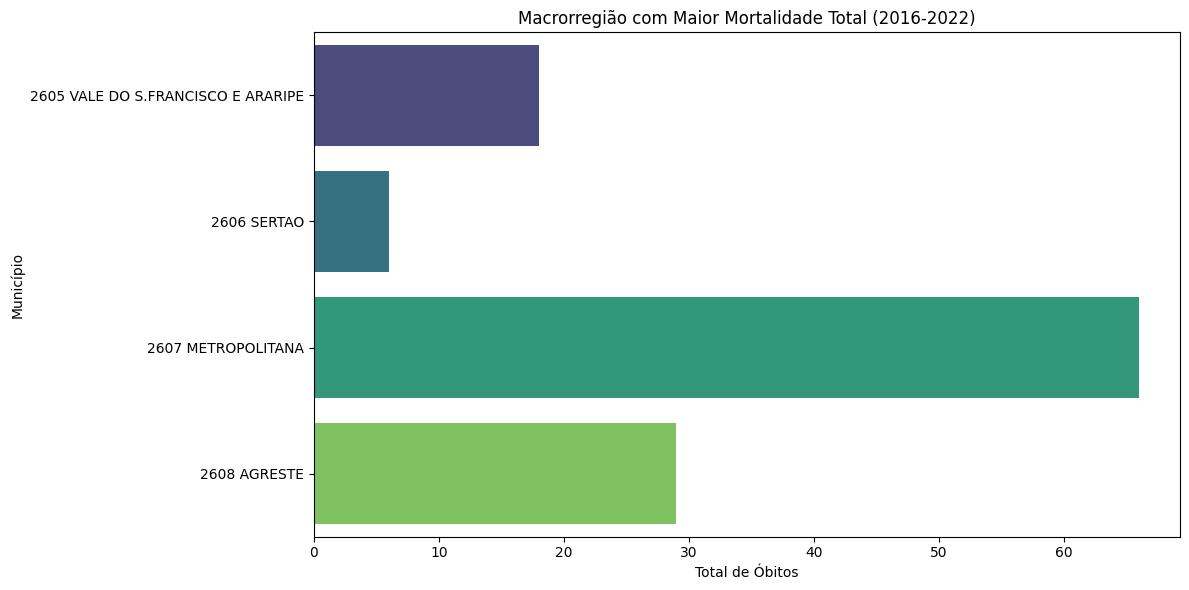

In [18]:
# Gráfico 2: Mortalidade por município
top_10_macrorregiao = Macrorregiao_total.head(10)

# Gráfico de barras para comparar municípios com maior mortalidade
plt.figure(figsize=(12, 6))
sns.barplot(x='Total', y='Macrorregião de Saúde', data=top_10_macrorregiao, palette='viridis')
plt.title('Macrorregião com Maior Mortalidade Total (2016-2022)')
plt.xlabel('Total de Óbitos')
plt.ylabel('Município')
plt.tight_layout()
plt.show()

## Por Raça/Cor

### Leitura De Arquivos

In [19]:
caminho_arquivo = '/content/MacrorregiaoCorEraca.csv'

In [20]:
df_raca = pd.read_csv(caminho_arquivo, sep=';', encoding='latin1', header=3)

In [21]:
df_raca

,Macrorregião de Saúde,Branca,Preta,Parda,Ignorado,Total
0,2605 VALE DO S.FRANCISCO E ARARIPE,3,2,12,1,18
1,2606 SERTAO,3,-,3,-,6
2,2607 METROPOLITANA,14,3,48,1,66
3,2608 AGRESTE,4,2,21,2,29
4,Total,24,7,84,4,119


In [22]:
df_raca.columns

Index(['Macrorregião de Saúde', 'Branca', 'Preta', 'Parda', 'Ignorado',
       'Total'],
      dtype='object')

In [23]:
df_raca.head()

,Macrorregião de Saúde,Branca,Preta,Parda,Ignorado,Total
0,2605 VALE DO S.FRANCISCO E ARARIPE,3,2,12,1,18
1,2606 SERTAO,3,-,3,-,6
2,2607 METROPOLITANA,14,3,48,1,66
3,2608 AGRESTE,4,2,21,2,29
4,Total,24,7,84,4,119


In [24]:
df_raca.tail()

,Macrorregião de Saúde,Branca,Preta,Parda,Ignorado,Total
0,2605 VALE DO S.FRANCISCO E ARARIPE,3,2,12,1,18
1,2606 SERTAO,3,-,3,-,6
2,2607 METROPOLITANA,14,3,48,1,66
3,2608 AGRESTE,4,2,21,2,29
4,Total,24,7,84,4,119


In [25]:
df_raca.columns

Index(['Macrorregião de Saúde', 'Branca', 'Preta', 'Parda', 'Ignorado',
       'Total'],
      dtype='object')

In [26]:
df_raca["Branca"]

,Branca
0,3
1,3
2,14
3,4
4,24


### Tratamento

In [27]:
df_raca.replace('-', 0, inplace=True)
df_raca.iloc[:, 1:] = df_raca.iloc[:, 1:].astype(int);

In [28]:
df_raca.head()

,Macrorregião de Saúde,Branca,Preta,Parda,Ignorado,Total
0,2605 VALE DO S.FRANCISCO E ARARIPE,3,2,12,1,18
1,2606 SERTAO,3,0,3,0,6
2,2607 METROPOLITANA,14,3,48,1,66
3,2608 AGRESTE,4,2,21,2,29
4,Total,24,7,84,4,119


## Por Escolaridade

###Leitura de arquivo

In [29]:
caminho_arquivo = '/content/MacrorregiaoEscolaridade.csv'

In [30]:
df_escolaridade = pd.read_csv(caminho_arquivo, sep=';', encoding='latin1', header=3)

In [31]:
df_escolaridade.head()

,Macrorregião de Saúde,Nenhuma,1 a 3 anos,4 a 7 anos,8 a 11 anos,12 anos e mais,Ignorado,Total
0,2605 VALE DO S.FRANCISCO E ARARIPE,-,2,6,6,1,3,18
1,2606 SERTAO,-,-,2,1,2,1,6
2,2607 METROPOLITANA,3,6,15,30,8,4,66
3,2608 AGRESTE,1,6,11,7,-,4,29
4,Total,4,14,34,44,11,12,119


In [32]:
df_escolaridade.tail()

,Macrorregião de Saúde,Nenhuma,1 a 3 anos,4 a 7 anos,8 a 11 anos,12 anos e mais,Ignorado,Total
0,2605 VALE DO S.FRANCISCO E ARARIPE,-,2,6,6,1,3,18
1,2606 SERTAO,-,-,2,1,2,1,6
2,2607 METROPOLITANA,3,6,15,30,8,4,66
3,2608 AGRESTE,1,6,11,7,-,4,29
4,Total,4,14,34,44,11,12,119


In [33]:
df_escolaridade.columns

Index(['Macrorregião de Saúde', 'Nenhuma', '1 a 3 anos', '4 a 7 anos',
       '8 a 11 anos', '12 anos e mais', 'Ignorado', 'Total'],
      dtype='object')

In [34]:
df_escolaridade['Nenhuma']

,Nenhuma
0,-
1,-
2,3
3,1
4,4


###Tratamento de Dados

In [35]:
df_escolaridade.replace('-', 0, inplace=True)
df_escolaridade.iloc[:, 1:] = df_escolaridade.iloc[:, 1:].astype(int);


In [36]:
df_escolaridade.tail()

,Macrorregião de Saúde,Nenhuma,1 a 3 anos,4 a 7 anos,8 a 11 anos,12 anos e mais,Ignorado,Total
0,2605 VALE DO S.FRANCISCO E ARARIPE,0,2,6,6,1,3,18
1,2606 SERTAO,0,0,2,1,2,1,6
2,2607 METROPOLITANA,3,6,15,30,8,4,66
3,2608 AGRESTE,1,6,11,7,0,4,29
4,Total,4,14,34,44,11,12,119


## Estado Civil

### Leitura e Tratamento

In [37]:
caminho_arquivo = '/content/MacrorregiaoEstadoCivil.csv'

In [38]:
df_EstadoCivil = pd.read_csv(caminho_arquivo, sep=';', encoding='latin1', header=3)

In [39]:
df_EstadoCivil.head()

,Macrorregião de Saúde,Solteiro,Casado,Separado judicialmente,Outro,Ignorado,Total
0,2605 VALE DO S.FRANCISCO E ARARIPE,5,4,1,6,2,18
1,2606 SERTAO,4,1,1,-,-,6
2,2607 METROPOLITANA,43,20,2,1,-,66
3,2608 AGRESTE,18,7,-,1,3,29
4,Total,70,32,4,8,5,119


In [40]:
df_EstadoCivil.replace('-', 0, inplace=True)

In [41]:
df_EstadoCivil.iloc[:, 1:] = df_escolaridade.iloc[:, 1:].astype(int);

In [42]:
df_EstadoCivil.head()

,Macrorregião de Saúde,Solteiro,Casado,Separado judicialmente,Outro,Ignorado,Total
0,2605 VALE DO S.FRANCISCO E ARARIPE,0,2,6,6,1,3
1,2606 SERTAO,0,0,2,1,2,1
2,2607 METROPOLITANA,3,6,15,30,8,4
3,2608 AGRESTE,1,6,11,7,0,4
4,Total,4,14,34,44,11,12


In [43]:
df_EstadoCivil.columns

Index(['Macrorregião de Saúde', 'Solteiro', 'Casado', 'Separado judicialmente',
       'Outro', 'Ignorado', 'Total'],
      dtype='object')

## Merge de Dados

###Combinando Dataset

In [44]:
# Unindo os datasets com base na coluna 'Macrorregião de Saúde'
df_combined = df.merge(df_raca, on='Macrorregião de Saúde', suffixes=('_idade', '_raca'))
df_combined = df_combined.merge(df_escolaridade, on='Macrorregião de Saúde', suffixes=('', '_escolaridade'))
df_combined = df_combined.merge(df_EstadoCivil, on='Macrorregião de Saúde', suffixes=('', '_estadocivil'))

In [45]:
df_combined.columns

Index(['Macrorregião de Saúde', '10 a 14 anos', '15 a 19 anos', '20 a 29 anos',
       '30 a 39 anos', '40 a 49 anos', 'Total_idade', 'Branca', 'Preta',
       'Parda', 'Ignorado', 'Total_raca', 'Nenhuma', '1 a 3 anos',
       '4 a 7 anos', '8 a 11 anos', '12 anos e mais', 'Ignorado_escolaridade',
       'Total', 'Solteiro', 'Casado', 'Separado judicialmente', 'Outro',
       'Ignorado_estadocivil', 'Total_estadocivil'],
      dtype='object')

In [46]:
#df_combined.head()

In [47]:
df_EstadoCivil.replace('-', 0, inplace=True)

In [48]:
df_EstadoCivil.iloc[:, 1:] = df_escolaridade.iloc[:, 1:].astype(int);

In [49]:
#df_combined.head()

In [50]:
df_combined['Preta']

,Preta
0,2
1,0
2,3
3,2


### Função e tratamento

In [51]:
def convert_to_numeric(df, columns):
    for column in columns:
        df[column] = pd.to_numeric(df[column], errors='coerce')

numeric_columns = ['10 a 14 anos', '15 a 19 anos', '20 a 29 anos', '30 a 39 anos', '40 a 49 anos',
                   'Total_idade', 'Branca', 'Preta', 'Parda', 'Ignorado', 'Total_raca',
                   'Nenhuma', '1 a 3 anos', '4 a 7 anos', '8 a 11 anos', '12 anos e mais',
                   'Ignorado_escolaridade', 'Total', 'Solteiro', 'Casado',
                   'Separado judicialmente', 'Outro', 'Ignorado_estadocivil', 'Total_estadocivil']


In [52]:
convert_to_numeric(df_combined, numeric_columns)

In [53]:
def format_table(df_combined):
    categorias = ["Faixa Etária", "Cor/Raça", "Escolaridade", "Estado Civil"]

    # Criando sub-tabelas
    faixa_etaria = df_combined[["10 a 14 anos", "15 a 19 anos", "20 a 29 anos", "30 a 39 anos", "40 a 49 anos"]].sum().reset_index()
    faixa_etaria.columns = ["Variáveis", "Total"]
    faixa_etaria_total = faixa_etaria["Total"].sum()  # Calculando o total da faixa_etaria

    cor_raca = df_combined[["Branca", "Preta", "Parda", "Ignorado"]].sum().reset_index()
    cor_raca.columns = ["Variáveis", "Total"]
    cor_raca_total = cor_raca["Total"].sum()  # Calculando o total de cor_raca

    escolaridade = df_combined[["Nenhuma", "1 a 3 anos", "4 a 7 anos", "8 a 11 anos", "12 anos e mais", "Ignorado_escolaridade"]].sum().reset_index()
    escolaridade.columns = ["Variáveis", "Total"]
    escolaridade_total = escolaridade["Total"].sum()  # Calculando o total de escolaridade

    estado_civil = df_combined[["Solteiro", "Casado", "Separado judicialmente", "Outro", "Ignorado_estadocivil"]].sum().reset_index()
    estado_civil.columns = ["Variáveis", "Total"]
    estado_civil_total = estado_civil["Total"].sum()  # Calculando o total de estado_civil

    # Calculando as porcentagens para cada tabela
    faixa_etaria["%"] = faixa_etaria["Total"].apply(lambda x: f"{(x / faixa_etaria_total * 100):.1f}%" if isinstance(x, (int, float)) else "")
    cor_raca["%"] = cor_raca["Total"].apply(lambda x: f"{(x / cor_raca_total * 100):.1f}%" if isinstance(x, (int, float)) else "")
    escolaridade["%"] = escolaridade["Total"].apply(lambda x: f"{(x / escolaridade_total * 100):.1f}%" if isinstance(x, (int, float)) else "")
    estado_civil["%"] = estado_civil["Total"].apply(lambda x: f"{(x / estado_civil_total * 100):.1f}%" if isinstance(x, (int, float)) else "")

    # Concatenando tabelas
    tabela_completa = pd.concat([
        pd.DataFrame({"Variáveis": [categorias[0]], "Total": [" "]}), faixa_etaria,
        pd.DataFrame({"Variáveis": [categorias[1]], "Total": [" "]}), cor_raca,
        pd.DataFrame({"Variáveis": [categorias[2]], "Total": [" "]}), escolaridade,
        pd.DataFrame({"Variáveis": [categorias[3]], "Total": [" "]}), estado_civil
    ], ignore_index=True)

    return tabela_completa

In [54]:
resultado = format_table(df_combined)

In [87]:
resultado

,Variáveis,Total,%
0,Faixa Etária,,NaN
1,10 a 14 anos,1,0.8%
2,15 a 19 anos,10,8.4%
3,20 a 29 anos,30,25.2%
4,30 a 39 anos,54,45.4%
5,40 a 49 anos,24,20.2%
6,Cor/Raça,,NaN
7,Branca,24,20.2%
8,Preta,7,5.9%
9,Parda,84,70.6%


### Great Tables

In [56]:
pip install great_tables

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 52.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 607.2/607.2 kB 33.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 6.5 MB/s eta 0:00:00


In [57]:
from great_tables import GT, md, html, style, loc
from great_tables.data import islands

In [58]:
#resultado

In [59]:
resultado['Variáveis'] = resultado['Variáveis'].replace({
    "Ignorado_escolaridade": "Ignorado",
    "Ignorado_estadocivil": "Ignorado"
})
#resultado

In [60]:
categorias_remover = ["Faixa Etária", "Cor/Raça", "Escolaridade", "Estado Civil"]
resultado_filtrado = resultado[~resultado["Variáveis"].isin(categorias_remover)]


In [61]:
resultado_filtrado

,Variáveis,Total,%
1,10 a 14 anos,1,0.8%
2,15 a 19 anos,10,8.4%
3,20 a 29 anos,30,25.2%
4,30 a 39 anos,54,45.4%
5,40 a 49 anos,24,20.2%
7,Branca,24,20.2%
8,Preta,7,5.9%
9,Parda,84,70.6%
10,Ignorado,4,3.4%
12,Nenhuma,4,3.4%


In [62]:
gt_tbl = resultado_filtrado.assign(group = ["Faixa Etária"] * 5 + ["Cor/Raça	"] * 4 + ["Escolaridade"] * 6  + ["Estado Civil	"] * 5)
#gt_tbl

### Tabela Variavel

In [63]:
gt_tbl = (
    GT(gt_tbl, rowname_col="Variáveis", groupname_col="group")
    .tab_source_note(
        source_note=md("Fonte: MS/SVS/CGIAE - Sistema de Informações sobre Mortalidade - SIM")
    )
    .tab_style(
        style=[style.fill("#D4EBF8"), style.text(weight="bold")],
        locations=loc.row_groups()
    )
    .tab_style(
        style=[style.fill("#81BFDA "), style.text(weight="bold")],
        locations=loc.stubhead()
    )
    .tab_style(
        style=[style.fill("#81BFDA "), style.text(weight="bold")],
        locations=loc.column_labels(columns="%")
    )
    .tab_style(
        style=[style.fill("#81BFDA "), style.text(weight="bold")],
        locations=loc.column_labels(columns="Total")
    )
    .tab_stubhead(label="Variáveis")

    .tab_options(
        table_border_top_color="#004D80",
        table_border_bottom_color="#004D80",
    )
)
gt_tbl


GT(_tbl_data=                 Variáveis Total      %           group
1             10 a 14 anos     1   0.8%    Faixa Etária
2             15 a 19 anos    10   8.4%    Faixa Etária
3             20 a 29 anos    30  25.2%    Faixa Etária
4             30 a 39 anos    54  45.4%    Faixa Etária
5             40 a 49 anos    24  20.2%    Faixa Etária
7                   Branca    24  20.2%      Cor/Raça\t
8                    Preta     7   5.9%      Cor/Raça\t
9                    Parda    84  70.6%      Cor/Raça\t
10                Ignorado     4   3.4%      Cor/Raça\t
12                 Nenhuma     4   3.4%    Escolaridade
13              1 a 3 anos    14  11.8%    Escolaridade
14              4 a 7 anos    34  28.6%    Escolaridade
15             8 a 11 anos    44  37.0%    Escolaridade
16          12 anos e mais    11   9.2%    Escolaridade
17                Ignorado    12  10.1%    Escolaridade
19                Solteiro     4   3.7%  Estado Civil\t
20                  Casado    14  13.1%  Estado Civil\t
21  Separado judicialmente    34  31.8%  Estado Civil\t
22                   Outro    44  41.1%  Estado Civil\t
23                Ignorado    11  10.3%  Estado Civil\t, _body=<great_tables._gt_data.Body object at 0x7c4628e7f2b0>, _boxhead=Boxhead([ColInfo(var='Variáveis', type=<ColInfoTypeEnum.stub: 2>, column_label='Variáveis', column_align='left', column_width=None), ColInfo(var='Total', type=<ColInfoTypeEnum.default: 1>, column_label='Total', column_align='right', column_width=None), ColInfo(var='%', type=<ColInfoTypeEnum.default: 1>, column_label='%', column_align='right', column_width=None), ColInfo(var='group', type=<ColInfoTypeEnum.row_group: 3>, column_label='group', column_align='left', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x7c46281b8e20>, _spanners=Spanners([]), _heading=Heading(title=None, subtitle=None, preheader=None), _stubhead='Variáveis', _source_notes=[Md(text='Fonte: MS/SVS/CGIAE - Sistema de Informações sobre Mortalidade - SIM')], _footnotes=[], _styles=[StyleInfo(locname=LocRowGroups(rows=None), grpname={'Estado Civil\t', 'Cor/Raça\t', 'Escolaridade', 'Faixa Etária'}, colname=None, rownum=None, colnum=None, styles=[CellStyleFill(color='#D4EBF8'), CellStyleText(color=None, font=None, size=None, align=None, v_align=None, style=None, weight='bold', stretch=None, decorate=None, transform=None, whitespace=None)]), StyleInfo(locname=LocStubhead(), grpname=None, colname=None, rownum=None, colnum=None, styles=[CellStyleFill(color='#81BFDA '), CellStyleText(color=None, font=None, size=None, align=None, v_align=None, style=None, weight='bold', stretch=None, decorate=None, transform=None, whitespace=None)]), StyleInfo(locname=LocColumnLabels(columns='%'), grpname=None, colname='%', rownum=None, colnum=None, styles=[CellStyleFill(color='#81BFDA '), CellStyleText(color=None, font=None, size=None, align=None, v_align=None, style=None, weight='bold', stretch=None, decorate=None, transform=None, whitespace=None)]), StyleInfo(locname=LocColumnLabels(columns='Total'), grpname=None, colname='Total', rownum=None, colnum=None, styles=[CellStyleFill(color='#81BFDA '), CellStyleText(color=None, font=None, size=None, align=None, v_align=None, style=None, weight='bold', stretch=None, decorate=None, transform=None, whitespace=None)])], _locale=<great_tables._gt_data.Locale object at 0x7c4628ec9d80>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='v

# Anuidade

### Inicialização de Dataset

In [64]:
path = '/content/MacroregiaoAnos.csv'

In [65]:
dataset = pd.read_csv(path, sep=';', encoding='latin1', header=3)


In [66]:
dataset

,Macrorregião de Saúde,2016,2017,2018,2019,2020,2021,2022,Total
0,2605 VALE DO S.FRANCISCO E ARARIPE,1,2,2,1,3,3,6,18
1,2606 SERTAO,-,1,1,-,1,2,1,6
2,2607 METROPOLITANA,5,10,9,7,12,14,9,66
3,2608 AGRESTE,6,4,8,2,5,2,2,29
4,Total,12,17,20,10,21,21,18,119


In [67]:
dataset.columns

Index(['Macrorregião de Saúde', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022', 'Total'],
      dtype='object')

In [68]:
dataset['Macrorregião de Saúde']

,Macrorregião de Saúde
0,2605 VALE DO S.FRANCISCO E ARARIPE
1,2606 SERTAO
2,2607 METROPOLITANA
3,2608 AGRESTE
4,Total


###Tratamento

In [69]:
dataset.replace('-', 0, inplace=True)
dataset.iloc[:, 1:] = dataset.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')


In [70]:
dataset

,Macrorregião de Saúde,2016,2017,2018,2019,2020,2021,2022,Total
0,2605 VALE DO S.FRANCISCO E ARARIPE,1,2,2,1,3,3,6,18
1,2606 SERTAO,0,1,1,0,1,2,1,6
2,2607 METROPOLITANA,5,10,9,7,12,14,9,66
3,2608 AGRESTE,6,4,8,2,5,2,2,29
4,Total,12,17,20,10,21,21,18,119


In [71]:
Mortalidade = dataset.copy()

In [72]:
dataset.columns

Index(['Macrorregião de Saúde', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022', 'Total'],
      dtype='object')

In [73]:
dataset['Macrorregião de Saúde']

,Macrorregião de Saúde
0,2605 VALE DO S.FRANCISCO E ARARIPE
1,2606 SERTAO
2,2607 METROPOLITANA
3,2608 AGRESTE
4,Total


###Dataset com porcentagem

In [74]:
def adicionar_porcentagem_no_dataset(df):
    anos = ['2016', '2017', '2018', '2019', '2020', '2021', '2022']

    df_resultado = df.copy()

    # Remover os números das macrorregiões
    df_resultado['Macrorregião de Saúde'] = df_resultado['Macrorregião de Saúde'].str.extract('([A-Za-z\s\.\-]+)', expand=False)

    for ano in anos:
        df_resultado[ano] = pd.to_numeric(df_resultado[ano], errors='coerce')

    # Iterando por cada linha (macrorregião)
    for _, row in df_resultado.iterrows():
        total = row['Total']

        # Calculando as porcentagens e adicionando novas colunas
        for ano in anos:
            valor = row[ano]
            # Substitui NaN por 0 e calcula a porcentagem
            porcentagem = (valor / total) * 100 if total != 0 else 0
            porcentagem = 0 if pd.isna(porcentagem) else round(porcentagem, 1)  # Substitui NaN por 0 e arredonda para 1 casa decimal
            df_resultado.loc[_, f'{ano}_porcentagem'] = porcentagem

    return df_resultado

dataset = adicionar_porcentagem_no_dataset(dataset)

In [75]:
dataset.columns

Index(['Macrorregião de Saúde', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022', 'Total', '2016_porcentagem', '2017_porcentagem',
       '2018_porcentagem', '2019_porcentagem', '2020_porcentagem',
       '2021_porcentagem', '2022_porcentagem'],
      dtype='object')

###Tabela Anuidade

In [76]:
gt_tbl_anuidade = (
    GT(dataset, rowname_col="Macrorregião de Saúde")
    .tab_stubhead("Macrorregião")
    .tab_source_note(
        source_note=md("Fonte: MS/SVS/CGIAE - Sistema de Informações sobre Mortalidade - SIM")
    )
    .tab_style(
        style=[style.fill("#81BFDA"), style.text(weight="bold")],
        locations=loc.stubhead()
    )

    .tab_spanner(
        label="2016",
        columns=["2016", "2016_porcentagem"]
    )
    .tab_spanner(
        label="2017",
        columns=["2017", "2017_porcentagem"]
    )
    .tab_spanner(
        label="2018",
        columns=["2018", "2018_porcentagem"]
    )
    .tab_spanner(
        label="2019",
        columns=["2019", "2019_porcentagem"]
    )
    .tab_spanner(
        label="2020",
        columns=["2020", "2020_porcentagem"]
    )
    .tab_spanner(
        label="2021",
        columns=["2021", "2021_porcentagem"]
    )
    .tab_spanner(
        label="2022",
        columns=["2022", "2022_porcentagem"]
    )
    .tab_spanner(
        label="Total",
        columns=["Total"]
    )

    .tab_style(
        style=[style.fill("#81BFDA"), style.text(weight="bold")],
        locations=loc.spanner_labels(ids=["2016", "2017", "2018", "2019", "2020", "2021", "2022", "Total"])
    )
    .tab_style(
        style=[style.fill("#81BFDA"), style.text(weight="bold")],
        locations=loc.column_header(),
        )



    .cols_label(
        **{
            "2016": "n",
            "2016_porcentagem": "%",
            "2017": " n",
            "2017_porcentagem": " %",
            "2018": " n",
            "2018_porcentagem": " %",
            "2019": " n",
            "2019_porcentagem": " %",
            "2020": " n",
            "2020_porcentagem": " %",
            "2021": " n",
            "2021_porcentagem": " %",
            "2022": " n",
            "2022_porcentagem": " %",
            "Total": " n",
        }
    )
)

gt_tbl_anuidade

GT(_tbl_data=            Macrorregião de Saúde  2016  2017  2018  2019  2020  2021  2022  \
0   VALE DO S.FRANCISCO E ARARIPE     1     2     2     1     3     3     6   
1                          SERTAO     0     1     1     0     1     2     1   
2                   METROPOLITANA     5    10     9     7    12    14     9   
3                         AGRESTE     6     4     8     2     5     2     2   
4                           Total    12    17    20    10    21    21    18   

   Total  2016_porcentagem  2017_porcentagem  2018_porcentagem  \
0     18               5.6              11.1              11.1   
1      6               0.0              16.7              16.7   
2     66               7.6              15.2              13.6   
3     29              20.7              13.8              27.6   
4    119              10.1              14.3              16.8   

   2019_porcentagem  2020_porcentagem  2021_porcentagem  2022_porcentagem  
0               5.6              16.7              16.7              33.3  
1               0.0              16.7              33.3              16.7  
2              10.6              18.2              21.2              13.6  
3               6.9              17.2               6.9               6.9  
4               8.4              17.6              17.6              15.1  , _body=<great_tables._gt_data.Body object at 0x7c46291f97e0>, _boxhead=Boxhead([ColInfo(var='Macrorregião de Saúde', type=<ColInfoTypeEnum.stub: 2>, column_label='Macrorregião de Saúde', column_align='left', column_width=None), ColInfo(var='2016', type=<ColInfoTypeEnum.default: 1>, column_label='n', column_align='right', column_width=None), ColInfo(var='2016_porcentagem', type=<ColInfoTypeEnum.default: 1>, column_label='%', column_align='right', column_width=None), ColInfo(var='2017', type=<ColInfoTypeEnum.default: 1>, column_label=' n', column_align='right', column_width=None), ColInfo(var='2017_porcentagem', type=<ColInfoTypeEnum.default: 1>, column_label=' %', column_align='right', column_width=None), ColInfo(var='2018', type=<ColInfoTypeEnum.default: 1>, column_label=' n', column_align='right', column_width=None), ColInfo(var='2018_porcentagem', type=<ColInfoTypeEnum.default: 1>, column_label=' %', column_align='right', column_width=None), ColInfo(var='2019', type=<ColInfoTypeEnum.default: 1>, column_label=' n', column_align='right', column_width=None), ColInfo(var='2019_porcentagem', type=<ColInfoTypeEnum.default: 1>, column_label=' %', column_align='right', column_width=None), ColInfo(var='2020', type=<ColInfoTypeEnum.default: 1>, column_label=' n', column_align='right', column_width=None), ColInfo(var='2020_porcentagem', type=<ColInfoTypeEnum.default: 1>, column_label=' %', column_align='right', column_width=None), ColInfo(var='2021', type=<ColInfoTypeEnum.default: 1>, column_label=' n', column_align='right', column_width=None), ColInfo(var='2021_porcentagem', type=<ColInfoTypeEnum.default: 1>, column_label=' %', column_align='right', column_width=None), ColInfo(var='2022', type=<ColInfoTypeEnum.default: 1>, column_label=' n', column_align='right', column_width=None), ColInfo(var='2022_porcentagem', type=<ColInfoTypeEnum.default: 1>, column_label=' %', column_align='right', column_width=None), ColInfo(var='Total', type=<ColInfoTypeEnum.default: 1>, column_label=' n', column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x7c46291fba60>, _spanners=Spanners([SpannerInfo(spanner_id='2016', spanner_level=0, spanner_label='2016', spanner_units=None, spanner_pattern=None, vars=['2016', '2016_porcentagem'], built=None), SpannerInfo(spanner_id='2017', spanner_level=0, spanner_label='2017', spanner_units=None, spanner_pattern=None, vars=['2017', '2017_porcentagem'], built=None), SpannerInfo(spanner_id='2018', spanner_level=0, spanner_label='2018', spanner_units=None, spanner_pattern=None, vars=['2018', '2018_porcentagem'], built=None), SpannerInfo(spanner_id='2019', spanner_level=

### Razão de Mortalidade Materna

In [77]:
Mortalidade

,Macrorregião de Saúde,2016,2017,2018,2019,2020,2021,2022,Total
0,2605 VALE DO S.FRANCISCO E ARARIPE,1,2,2,1,3,3,6,18
1,2606 SERTAO,0,1,1,0,1,2,1,6
2,2607 METROPOLITANA,5,10,9,7,12,14,9,66
3,2608 AGRESTE,6,4,8,2,5,2,2,29
4,Total,12,17,20,10,21,21,18,119


In [78]:
Mortalidade = Mortalidade[Mortalidade['Macrorregião de Saúde'] == 'Total']
Mortalidade

,Macrorregião de Saúde,2016,2017,2018,2019,2020,2021,2022,Total
4,Total,12,17,20,10,21,21,18,119


In [79]:
path = '/content/NascidoVivo.csv'

In [80]:
nascidoVivos = pd.read_csv(path, sep=';', encoding='latin1', header=3)

In [81]:
nascidoVivos

,Macrorregião de Saúde,2016,2017,2018,2019,2020,2021,2022,Total
0,2605 VALE DO S.FRANCISCO E ARARIPE,16536,16297,17272,17018,16431,16515,15628,115697
1,2606 SERTAO,11549,12245,13028,12571,12475,12370,11590,85828
2,2607 METROPOLITANA,77059,79953,79362,75787,72311,70346,64642,519460
3,2608 AGRESTE,25583,27411,28623,27970,27253,26961,25565,189366
4,Ignorado - PE,6,26,32,13,11,19,12,119
5,Total,130733,135932,138317,133359,128481,126211,117437,910470


In [82]:
nascidoVivos = nascidoVivos[nascidoVivos['Macrorregião de Saúde'] == 'Total']
nascidoVivos

,Macrorregião de Saúde,2016,2017,2018,2019,2020,2021,2022,Total
5,Total,130733,135932,138317,133359,128481,126211,117437,910470


In [83]:
Mortalidade.columns, nascidoVivos.columns

(Index(['Macrorregião de Saúde', '2016', '2017', '2018', '2019', '2020', '2021',
        '2022', 'Total'],
       dtype='object'),
 Index(['Macrorregião de Saúde', '2016', '2017', '2018', '2019', '2020', '2021',
        '2022', 'Total'],
       dtype='object'))

In [84]:
def calcular_razao_mortalidade_materna(mortalidade, nascidos_vivos):
    anos = ['2016', '2017', '2018', '2019', '2020', '2021', '2022']

    total_mortalidade = mortalidade[mortalidade['Macrorregião de Saúde'] == 'Total']
    total_nascidos_vivos = nascidos_vivos[nascidos_vivos['Macrorregião de Saúde'] == 'Total']

    razao = {
        "Ano": anos,
        "NV*": [total_nascidos_vivos[ano].values[0] for ano in anos],
        "Óbito Materno": [total_mortalidade[ano].values[0] for ano in anos],
        "RMM**": [
            round(
                (total_mortalidade[ano].values[0] / total_nascidos_vivos[ano].values[0]) * 100000,
                2
            ) if total_nascidos_vivos[ano].values[0] != 0 else 0
            for ano in anos
        ]
    }

    df_razao = pd.DataFrame(razao)

    return df_razao

In [85]:
razaoMortalidade = calcular_razao_mortalidade_materna(Mortalidade, nascidoVivos)
razaoMortalidade

,Ano,NV*,Óbito Materno,RMM**
0,2016,130733,12,9.18
1,2017,135932,17,12.51
2,2018,138317,20,14.46
3,2019,133359,10,7.50
4,2020,128481,21,16.34
5,2021,126211,21,16.64
6,2022,117437,18,15.33


###Tabela

In [86]:
gt_tbl_rmm = (
    GT(razaoMortalidade, rowname_col="Ano")
    .tab_stubhead("Ano")
    .tab_source_note(
        source_note=md("Fonte: MS/SVS/CGIAE - Sistema de Informações sobre Mortalidade - SIM")
    )
    .tab_style(
        style=[style.fill("#81BFDA"), style.text(weight="bold"), style.borders(sides="all", color="black", style="solid", weight="2px")],
        locations=loc.stubhead()  # Aplica estilo ao cabeçalho do stub (Ano)
    )

    .tab_style(
        style=[style.fill("#81BFDA "), style.text(weight="bold"), style.borders(sides="all", color="black", style="solid", weight="2px")],
        locations=loc.column_labels(columns="NV*")
    )

    .tab_style(
        style=[style.fill("#81BFDA "), style.text(weight="bold"), style.borders(sides="all", color="black", style="solid", weight="2px")],
        locations=loc.column_labels(columns="Óbito Materno")
    )

    .tab_style(
        style=[style.fill("#81BFDA "), style.text(weight="bold"), style.borders(sides="all", color="black", style="solid", weight="2px")],
        locations=loc.column_labels(columns="RMM**")
    )

    .tab_source_note(
        source_note = md("NV*: Nascidos Vivos")

    )

    .tab_source_note(
        source_note = md("RMM**: Razão Mortalidade Materna")
    )



)

gt_tbl_rmm


GT(_tbl_data=    Ano     NV*  Óbito Materno  RMM**
0  2016  130733             12   9.18
1  2017  135932             17  12.51
2  2018  138317             20  14.46
3  2019  133359             10   7.50
4  2020  128481             21  16.34
5  2021  126211             21  16.64
6  2022  117437             18  15.33, _body=<great_tables._gt_data.Body object at 0x7c4628daddb0>, _boxhead=Boxhead([ColInfo(var='Ano', type=<ColInfoTypeEnum.stub: 2>, column_label='Ano', column_align='right', column_width=None), ColInfo(var='NV*', type=<ColInfoTypeEnum.default: 1>, column_label='NV*', column_align='right', column_width=None), ColInfo(var='Óbito Materno', type=<ColInfoTypeEnum.default: 1>, column_label='Óbito Materno', column_align='right', column_width=None), ColInfo(var='RMM**', type=<ColInfoTypeEnum.default: 1>, column_label='RMM**', column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x7c4628dac5e0>, _spanners=Spanners([]), _heading=Heading(title=None, subtitle=None, preheader=None), _stubhead='Ano', _source_notes=[Md(text='Fonte: MS/SVS/CGIAE - Sistema de Informações sobre Mortalidade - SIM'), Md(text='NV*: Nascidos Vivos'), Md(text='RMM**: Razão Mortalidade Materna')], _footnotes=[], _styles=[StyleInfo(locname=LocStubhead(), grpname=None, colname=None, rownum=None, colnum=None, styles=[CellStyleFill(color='#81BFDA'), CellStyleText(color=None, font=None, size=None, align=None, v_align=None, style=None, weight='bold', stretch=None, decorate=None, transform=None, whitespace=None), CellStyleBorders(sides='all', color='black', style='solid', weight='2px')]), StyleInfo(locname=LocColumnLabels(columns='NV*'), grpname=None, colname='NV*', rownum=None, colnum=None, styles=[CellStyleFill(color='#81BFDA '), CellStyleText(color=None, font=None, size=None, align=None, v_align=None, style=None, weight='bold', stretch=None, decorate=None, transform=None, whitespace=None), CellStyleBorders(sides='all', color='black', style='solid', weight='2px')]), StyleInfo(locname=LocColumnLabels(columns='Óbito Materno'), grpname=None, colname='Óbito Materno', rownum=None, colnum=None, styles=[CellStyleFill(color='#81BFDA '), CellStyleText(color=None, font=None, size=None, align=None, v_align=None, style=None, weight='bold', stretch=None, decorate=None, transform=None, whitespace=None), CellStyleBorders(sides='all', color='black', style='solid', weight='2px')]), StyleInfo(locname=LocColumnLabels(columns='RMM**'), grpname=None, colname='RMM**', rownum=None, colnum=None, styles=[CellStyleFill(color='#81BFDA '), CellStyleText(color=None, font=None, size=None, align=None, v_align=None, style=None, weight='bold', stretch=None, decorate=None, transform=None, whitespace=None), CellStyleBorders(sides='all', color='black', style='solid', weight='2px')])], _locale=<great_tables._gt_data.Locale object at 0x7c462a09df30>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value=